In [2]:
from scipy.stats import variation
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.tsatools import lagmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [25]:
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
sentiment=pd.read_csv('Headline_Sentiment.csv', index_col=0)
sentiment.index=pd.DatetimeIndex(sentiment.index)
sentiment

sentiment
time                              
2008-01-01 00:00:49.802  -0.011428
2008-01-01 00:02:19.241  -0.006654
2008-01-01 00:03:46.821  -0.014437
2008-01-01 00:07:58.402   0.001210
2008-01-01 00:12:00.431  -0.014352
...                            ...
2008-12-31 18:39:14.257  -0.933669
2008-12-31 18:40:45.405  -0.429961
2008-12-31 18:46:58.628   0.095313
2008-12-31 18:58:17.225  -0.031112
2008-12-31 18:59:24.793  -0.987662

[514458 rows x 1 columns]

In [4]:
leh=pd.read_csv('2008-01-02-LEH.N-bbo.csv', index_col=0)
leh.index=pd.DatetimeIndex(leh.index)
leh

bid-price  bid-volume  ask-price  ask-volume
time                                                                       
2008-01-02 14:31:59.900999680      64.95           5      65.00          70
2008-01-02 14:31:59.900999680      64.95           5      65.00          64
2008-01-02 14:31:59.900999680      64.95          12      65.00          64
2008-01-02 14:31:59.900999680      64.95          12      65.00          63
2008-01-02 14:31:59.900999680      64.95           5      65.00          63
...                                  ...         ...        ...         ...
2008-01-02 20:59:59.602999552      62.23          13      62.24           5
2008-01-02 20:59:59.668000000      62.23          33      62.24           5
2008-01-02 21:00:00.089000192      62.23          23      62.24           5
2008-01-02 21:01:16.213999616      62.18         283      62.24           5
2008-01-02 21:25:28.845999872      62.18           1      62.24           1

[88840 rows x 4 columns]

In [5]:
leh.assign(var_bid_price=leh['bid-price'].diff(), var_bid_volume=leh['bid-volume'].diff(),var_ask_price=leh['ask-price'].diff(),var_ask_volume=leh['ask-volume'].diff())

bid-price  bid-volume  ask-price  ask-volume  \
time                                                                          
2008-01-02 14:31:59.900999680      64.95           5      65.00          70   
2008-01-02 14:31:59.900999680      64.95           5      65.00          64   
2008-01-02 14:31:59.900999680      64.95          12      65.00          64   
2008-01-02 14:31:59.900999680      64.95          12      65.00          63   
2008-01-02 14:31:59.900999680      64.95           5      65.00          63   
...                                  ...         ...        ...         ...   
2008-01-02 20:59:59.602999552      62.23          13      62.24           5   
2008-01-02 20:59:59.668000000      62.23          33      62.24           5   
2008-01-02 21:00:00.089000192      62.23          23      62.24           5   
2008-01-02 21:01:16.213999616      62.18         283      62.24           5   
2008-01-02 21:25:28.845999872      62.18           1      62.24           1   

                               var_bid_price  var_bid_volume  var_ask_price  \
time                                                                          
2008-01-02 14:31:59.900999680            NaN             NaN            NaN   
2008-01-02 14:31:59.900999680           0.00             0.0            0.0   
2008-01-02 14:31:59.900999680           0.00             7.0            0.0   
2008-01-02 14:31:59.900999680           0.00             0.0            0.0   
2008-01-02 14:31:59.900999680           0.00            -7.0            0.0   
...                                      ...             ...            ...   
2008-01-02 20:59:59.602999552           0.00             2.0            0.0   
2008-01-02 20:59:59.668000000           0.00            20.0            0.0   
2008-01-02 21:00:00.089000192           0.00           -10.0            0.0   
2008-01-02 21:01:16.213999616          -0.05           260.0            0.0   
2008-01-02 21:25:28.845999872           0.00          -282.0            0.0   

                               var_ask_volume  
time                                           
2008-01-02 14:31:59.900999680             NaN  
2008-01-02 14:31:59.900999680            -6.0  
2008-01-02 14:31:59.900999680             0.0  
2008-01-02 14:31:59.900999680            -1.0  
2008-01-02 14:31:59.900999680             0.0  
...                                       ...  
2008-01-02 20:59:59.602999552             0.0  
2008-01-02 20:59:59.668000000             0.0  
2008-01-02 21:00:00.089000192             0.0  
2008-01-02 21:01:16.213999616             0.0  
2008-01-02 21:25:28.845999872            -4.0  

[88840 rows x 8 columns]

In [6]:
df=pd.read_csv('2008-01-02-LEH.N-bbo.csv', index_col=0)
lag = 5
for column in df :
    X =np.array(lagmat(df[column], lag))
    for i in range (lag):
        df['lag'+str(i)+" "+column]=X[:,i]
df

bid-price  bid-volume  ask-price  ask-volume  \
time                                                                          
2008-01-02 14:31:59.900999680      64.95           5      65.00          70   
2008-01-02 14:31:59.900999680      64.95           5      65.00          64   
2008-01-02 14:31:59.900999680      64.95          12      65.00          64   
2008-01-02 14:31:59.900999680      64.95          12      65.00          63   
2008-01-02 14:31:59.900999680      64.95           5      65.00          63   
...                                  ...         ...        ...         ...   
2008-01-02 20:59:59.602999552      62.23          13      62.24           5   
2008-01-02 20:59:59.668000000      62.23          33      62.24           5   
2008-01-02 21:00:00.089000192      62.23          23      62.24           5   
2008-01-02 21:01:16.213999616      62.18         283      62.24           5   
2008-01-02 21:25:28.845999872      62.18           1      62.24           1   

                               lag0 bid-price  lag1 bid-price  lag2 bid-price  \
time                                                                            
2008-01-02 14:31:59.900999680            0.00            0.00            0.00   
2008-01-02 14:31:59.900999680           64.95            0.00            0.00   
2008-01-02 14:31:59.900999680           64.95           64.95            0.00   
2008-01-02 14:31:59.900999680           64.95           64.95           64.95   
2008-01-02 14:31:59.900999680           64.95           64.95           64.95   
...                                       ...             ...             ...   
2008-01-02 20:59:59.602999552           62.23           62.23           62.19   
2008-01-02 20:59:59.668000000           62.23           62.23           62.23   
2008-01-02 21:00:00.089000192           62.23           62.23           62.23   
2008-01-02 21:01:16.213999616           62.23           62.23           62.23   
2008-01-02 21:25:28.845999872           62.18           62.23           62.23   

                               lag3 bid-price  lag4 bid-price  \
time                                                            
2008-01-02 14:31:59.900999680            0.00            0.00   
2008-01-02 14:31:59.900999680            0.00            0.00   
2008-01-02 14:31:59.900999680            0.00            0.00   
2008-01-02 14:31:59.900999680            0.00            0.00   
2008-01-02 14:31:59.900999680           64.95            0.00   
...                                       ...             ...   
2008-01-02 20:59:59.602999552           62.19           62.19   
2008-01-02 20:59:59.668000000           62.19           62.19   
2008-01-02 21:00:00.089000192           62.23           62.19   
2008-01-02 21:01:16.213999616           62.23           62.23   
2008-01-02 21:25:28.845999872           62.23           62.23   

                               lag0 bid-volume  ...  lag0 ask-price  \
time                                            ...                   
2008-01-02 14:31:59.900999680              0.0  ...            0.00   
2008-01-02 14:31:59.900999680              5.0  ...           65.00   
2008-01-02 14:31:59.900999680              5.0  ...           65.00   
2008-01-02 14:31:59.900999680             12.0  ...           65.00   
2008-01-02 14:31:59.900999680             12.0  ...           65.00   
...                                        ...  ...             ...   
2008-01-02 20:59:59.602999552             11.0  ...           62.24   
2008-01-02 20:59:59.668000000             13.0  ...           62.24   
2008-01-02 21:00:00.089000192             33.0  ...           62.24   
2008-01-02 21:01:16.213999616             23.0  ...           62.24   
2008-01-02 21:25:28.845999872            283.0  ...           62.24   

                               lag1 ask-price  lag2 ask-price  lag3 ask-price  \
time                                                                            
2008-01-02 14:31:

Create a test and a train set 

In [27]:
dr=df[:int(len(df.index))]
split = 0.80
isplit = int(len(dr.index)*split)
xt = dr[3:len(dr.index)-1]
yt = dr[4:]["ask-price"]
print(xt.head())
xtrain, ytrain, xtest, ytest = xt[:isplit], yt[:isplit], xt[isplit:], yt[isplit:]
print(len(xtrain.index),len(ytrain.index))

                               bid-price  bid-volume  ask-volume  \
time                                                               
2008-01-02 14:31:59.900999680      64.95          12          63   
2008-01-02 14:31:59.900999680      64.95           5          63   
2008-01-02 14:31:59.948000000      64.91           2          63   
2008-01-02 14:31:59.948000000      64.96           1          63   
2008-01-02 14:31:59.948000000      64.91           2          63   

                               lag0 bid-price  lag1 bid-price  lag2 bid-price  \
time                                                                            
2008-01-02 14:31:59.900999680           64.95           64.95           64.95   
2008-01-02 14:31:59.900999680           64.95           64.95           64.95   
2008-01-02 14:31:59.948000000           64.95           64.95           64.95   
2008-01-02 14:31:59.948000000           64.91           64.95           64.95   
2008-01-02 14:31:59.948000000        

Decision Tree

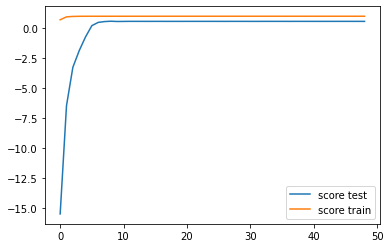

In [8]:
n=50
scoretest=[]
scoretrain=[]

for i in range(1,n):
    decisiontree=DecisionTreeRegressor(max_depth=i)
    decisiontree=decisiontree.fit(xtrain,ytrain)
    scoretest.append(decisiontree.score(xtest,ytest))
    scoretrain.append(decisiontree.score(xtrain,ytrain))
plt.plot(scoretest,label='score test')
plt.plot(scoretrain, label='score train')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

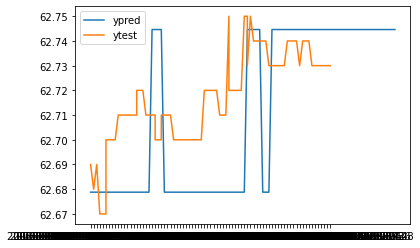

In [9]:
decisiontree=DecisionTreeRegressor(max_depth=5).fit(xtrain,ytrain)

ypred=decisiontree.predict(xtest[:100])
plt.plot(ypred,label='ypred')
plt.plot(ytest[:100],label='ytest')
plt.legend()
plt.show

Random Forest

Dependence with max_depth

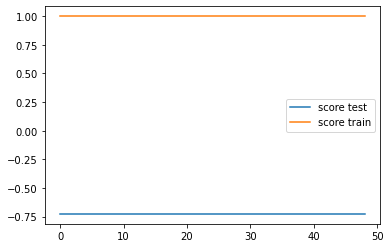

In [16]:
n=50
scoretest=[]
scoretrain=[]

for i in range(1,n):
    randomforest=RandomForestRegressor(max_depth=i,n_estimators=50)
    randomforest=decisiontree.fit(xtrain,ytrain)
    scoretest.append(randomforest.score(xtest,ytest))
    scoretrain.append(randomforest.score(xtrain,ytrain))
plt.plot(scoretest,label='score test')
plt.plot(scoretrain, label='score train')
plt.legend()
plt.show()

Dependence with n_estimators

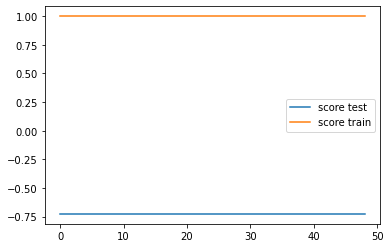

In [17]:
n=50
scoretest=[]
scoretrain=[]

for i in range(1,n):
    randomforest=RandomForestRegressor(max_depth=5,n_estimators=i)
    randomforest=decisiontree.fit(xtrain,ytrain)
    scoretest.append(randomforest.score(xtest,ytest))
    scoretrain.append(randomforest.score(xtrain,ytrain))
plt.plot(scoretest,label='score test')
plt.plot(scoretrain, label='score train')
plt.legend()
plt.show()

In [20]:
rf=RandomForestRegressor(max_depth=10,n_estimators=30)
rf=rf.fit(xtrain,ytrain)

<function matplotlib.pyplot.show(close=None, block=None)>

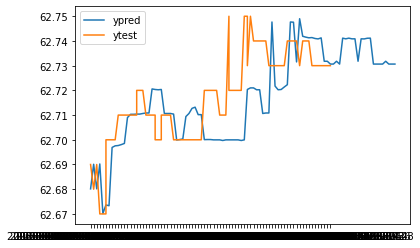

In [21]:
ypred=rf.predict(xtest[:100])
plt.plot(ypred,label='ypred')
plt.plot(ytest[:100],label='ytest')
plt.legend()
plt.show

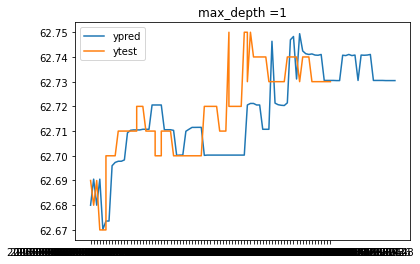

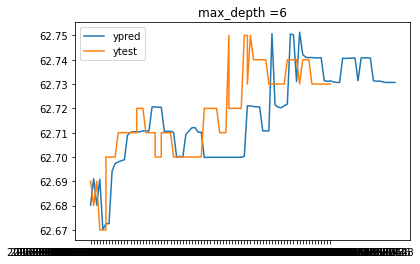

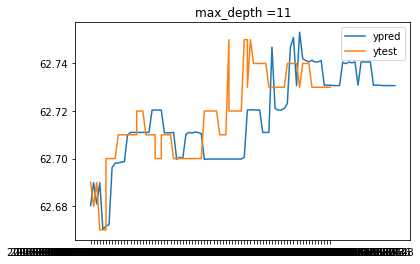

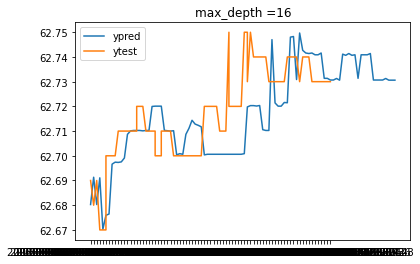

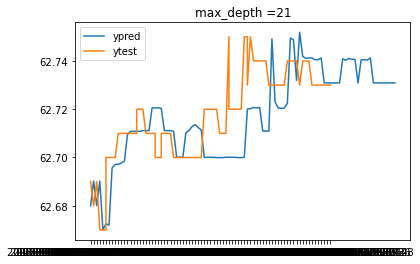

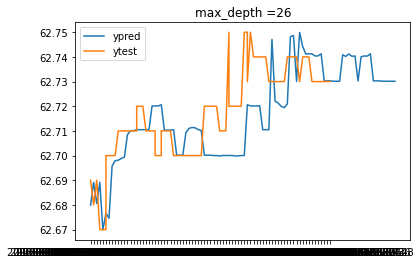

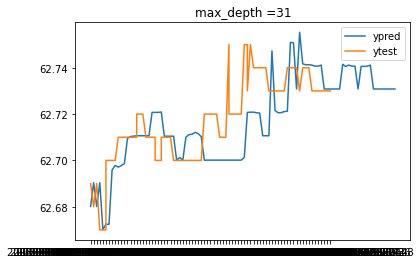

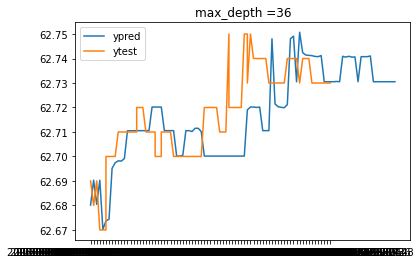

In [24]:
estimator=30

for max in range(1,40,5):
    rf=RandomForestRegressor(max_depth=10,n_estimators=30)
    rf=rf.fit(xtrain,ytrain)
    ypred=rf.predict(xtest[:100])
    plt.plot(ypred,label='ypred')
    plt.plot(ytest[:100],label='ytest')
    plt.title('max_depth ='+str(max))
    plt.legend()
    plt.show()

In [32]:
pearsonr(ytest[:100],ypred)

(0.8924929910563127, 1.1710994070831916e-35)

In [31]:
model=RandomForestRegressor(max_depth=10,n_estimators=30)
decision_tree_predictions_matrix = [[decisiontree.predict(np.array([xtest.iloc[i]]))[0] for decision_tree in model.estimators_] for i in range(len(xtest))]
decision_tree_predictions_matrix 

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [ ]:
lower_bound_predictions = [np.percentile(prediction_distribution, 5) for prediction_distribution in decision_tree_predictions_matrix]
upper_bound_predictions = [np.percentile(prediction_distribution, 95) for prediction_distribution in decision_tree_predictions_matrix]

In [ ]:
ground_truth_inside_interval = len([1 for i, value in enumerate(ytest) if lower_bound_predictions[i] <= value <= upper_bound_predictions[i]])
ground_truth_inside_interval_percentage = ground_truth_inside_interval / len(ytest)